In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root 
change_wd_to_project_root()
from pyforest import *

# public packages
import logging
from keras.models import model_from_json
from numpy import newaxis
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from src.utils.utils_io import Console_and_file_logger, ensure_dir

Console_and_file_logger('kfold evaluations', logging.INFO)



search for root_dir and set working directory
Working directory set to: /mnt/data/git/cardio


Using TensorFlow backend.
2020-03-16 21:58:14,791 INFO -------------------- Start --------------------
2020-03-16 21:58:14,791 INFO Working directory: /mnt/data/git/cardio.
2020-03-16 21:58:14,792 INFO Log file: ./logs/kfold evaluations.log


# combine two evaluation dataframes

In [2]:
# load both dataframes
df_1 = pd.read_csv('reports/evaluation/2D/kfoldnewgcn_unsigned/gcn/evaluation_score.csv')
df_2 = pd.read_csv('reports/evaluation/2D/kfoldnewgcn_unsigned/acdc/evaluation_score.csv')
df_comb = pd.concat([df_1, df_2]).set_index('Evaluation')
# drop duplicates
df_comb = df_comb.reset_index().drop_duplicates(subset='Evaluation',keep='first').set_index('Evaluation')
# index cleaning
df_comb.index = df_comb.index.str.replace('tetrat', 'tetra_t')
df_comb.index = df_comb.index.str.replace('tetraa', 'tetra_a')
df_comb.index = df_comb.index.str.replace('acdca', 'acdc_a')
df_comb.index = df_comb.index.str.replace('acdct', 'acdc_t')
#df_comb.index = df_comb.index.str.replace('2D/kfoldnewgcn_unsigned/acdc/', '2D/GCN/kfoldgcn_unsigned/')
# create three new columns with info from index
df_comb['trained'] = [e[1].split('/')[1] for e in df_comb.index.str.split('_')]
df_comb['trained'] = df_comb['trained'].str.replace('kfold', 'GCN')
df_comb['fold'] = [e[-2] for e in df_comb.index.str.split('_')]
df_comb['evaluate'] = ['{}_{}'.format(e[-4],e[-1]) for e in df_comb.index.str.split('_')]
# sort by index and drop loss and background score
df_comb = df_comb.sort_index()
df_comb = df_comb.drop(['loss', 'dice_coef_background'], axis=1)
df_comb.shape

(24, 7)

In [3]:
df_comb

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv,trained,fold,evaluate
Evaluation,,,,,,,
2D/GCN_2nd/kfold_unsigned32/fold0_acdc_all_0_all,0.798023,0.734767,0.867169,0.789028,GCN,0,acdc_all
2D/GCN_2nd/kfold_unsigned32/fold0_gcn_all_0_test,0.897916,0.827375,0.941728,0.903951,GCN,0,gcn_test
2D/GCN_2nd/kfold_unsigned32/fold0_gcn_all_0_train,0.912460,0.847340,0.945687,0.922039,GCN,0,gcn_train
2D/GCN_2nd/kfold_unsigned32/fold1_acdc_all_1_all,0.836933,0.773260,0.902374,0.832656,GCN,1,acdc_all
2D/GCN_2nd/kfold_unsigned32/fold1_gcn_all_1_test,0.874944,0.813423,0.922169,0.873629,GCN,1,gcn_test
2D/GCN_2nd/kfold_unsigned32/fold1_gcn_all_1_train,0.903430,0.833670,0.938154,0.914332,GCN,1,gcn_train
2D/GCN_2nd/kfold_unsigned32/fold2_acdc_all_2_all,0.825537,0.768906,0.898015,0.809022,GCN,2,acdc_all
2D/GCN_2nd/kfold_unsigned32/fold2_gcn_all_2_test,0.896073,0.835250,0.938651,0.898336,GCN,2,gcn_test
2D/GCN_2nd/kfold_unsigned32/fold2_gcn_all_2_train,0.913082,0.845484,0.944648,0.925273,GCN,2,gcn_train


In [4]:
# better namings
df_comb['evaluate'] = df_comb['evaluate'].str.replace('tetra_', 'GCN ')
df_comb['evaluate'] = df_comb['evaluate'].str.replace('acdc_', 'ACDC ')
df_comb['evaluate'] = df_comb['evaluate'].str.replace('gcn_', 'GCN ')
df_comb['evaluate'] = df_comb['evaluate'].str.replace('_', ' ')


df_comb['trained'] = df_comb['trained'].str.replace('tetra', 'GCN')
df_comb['trained'] = df_comb['trained'].str.replace('gcn', 'GCN')
df_comb['trained'] = df_comb['trained'].str.replace('acdc', 'ACDC')

# custom ordering for the evaluation paths
df_comb['evaluate'] = pd.Categorical(df_comb['evaluate'], ['ACDC train', 'GCN train', 'ACDC test', 'GCN test', 'ACDC all', 'GCN all'])
df_comb = df_comb.sort_values('evaluate')
df_comb

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv,trained,fold,evaluate
Evaluation,,,,,,,
2D/kfoldnewgcn_unsigned/acdc/fold2_acdc_all_2_train,0.923911,0.892418,0.952765,0.926180,ACDC,2,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold1_acdc_all_1_train,0.930180,0.898435,0.959405,0.932528,ACDC,1,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold0_acdc_all_0_train,0.922216,0.889942,0.953620,0.923667,ACDC,0,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold3_acdc_all_3_train,0.933939,0.905102,0.962244,0.934215,ACDC,3,ACDC train
2D/GCN_2nd/kfold_unsigned32/fold1_gcn_all_1_train,0.903430,0.833670,0.938154,0.914332,GCN,1,GCN train
2D/kfoldnewgcn_unsigned/gcn/fold3_gcn_all_3_train,0.919726,0.854361,0.953164,0.929753,GCN,3,GCN train
2D/GCN_2nd/kfold_unsigned32/fold0_gcn_all_0_train,0.912460,0.847340,0.945687,0.922039,GCN,0,GCN train
2D/GCN_2nd/kfold_unsigned32/fold2_gcn_all_2_train,0.913082,0.845484,0.944648,0.925273,GCN,2,GCN train
2D/kfoldnewgcn_unsigned/acdc/fold2_acdc_all_2_test,0.904960,0.874681,0.944149,0.895065,ACDC,2,ACDC test


## Mean and population SD across both datasets, averaged over kfold=4 models each

In [5]:
def pop_std(x):
    """Helper to get the population SD, pandas returns a different SD as numpy by default"""
    return x.std(ddof=0)

# group by training and evaluation datasets --> 4 rows/folds per grouping
# aggregate over each of this 4 folds and calculate the mean and SD
# agg expects a dict with columnname: [list of functions which should be applied]
result = df_comb.groupby(['trained', 'evaluate'], as_index=False).agg({'dice_coef_labels':['mean',pop_std], 'dice_coef_lv':['mean',pop_std], 'dice_coef_myo':['mean',pop_std], 'dice_coef_rv':['mean',pop_std]})
result[['dice_coef_labels','dice_coef_rv','dice_coef_lv','dice_coef_myo']]

dice_coef_labels           dice_coef_rv           dice_coef_lv            \
              mean   pop_std         mean   pop_std         mean   pop_std   
0         0.927562  0.004728     0.929148  0.004358     0.957009  0.003958   
1         0.905007  0.001190     0.892931  0.005498     0.945162  0.001611   
2         0.805470  0.016510     0.808195  0.005763     0.863520  0.027604   
3         0.912174  0.005796     0.922849  0.005629     0.945413  0.005325   
4         0.886329  0.010697     0.888494  0.012900     0.930213  0.010129   
5         0.824751  0.016223     0.814897  0.017426     0.893036  0.015121   

  dice_coef_myo            
           mean   pop_std  
0      0.896474  0.005861  
1      0.876890  0.004387  
2      0.725264  0.024980  
3      0.845214  0.007442  
4      0.822491  0.009252  
5      0.764235  0.017467

# Mean 0.88/86 (Myo), 0.95/94 (LV), 0.91/0.88 (RV)

In [6]:
df_comb.groupby(['trained', 'evaluate']).mean().dropna()[['dice_coef_labels','dice_coef_rv','dice_coef_lv','dice_coef_myo']]

dice_coef_labels  dice_coef_rv  dice_coef_lv  \
trained evaluate                                                   
ACDC    ACDC train          0.927562      0.929148      0.957009   
        ACDC test           0.905007      0.892931      0.945162   
        GCN all             0.805470      0.808195      0.863520   
GCN     GCN train           0.912174      0.922849      0.945413   
        GCN test            0.886329      0.888494      0.930213   
        ACDC all            0.824751      0.814897      0.893036   

                    dice_coef_myo  
trained evaluate                   
ACDC    ACDC train       0.896474  
        ACDC test        0.876890  
        GCN all          0.725264  
GCN     GCN train        0.845214  
        GCN test         0.822491  
        ACDC all         0.764235

# Population SD

In [7]:
df_comb[df_comb['trained'] == 'GCN'].groupby(['trained', 'evaluate']).std(ddof=0).dropna()

dice_coef_labels  dice_coef_lv  dice_coef_myo  dice_coef_rv
trained evaluate                                                              
GCN     GCN train          0.005796      0.005325       0.007442      0.005629
        GCN test           0.010697      0.010129       0.009252      0.012900
        ACDC all           0.016223      0.015121       0.017467      0.017426

# Gap - trained on ACDC

## Generalisation gap within the ACDC dataset
0.010 (LV) - 0.026 (RV)

In [8]:
# absulute
df_comb[df_comb['trained'] == 'ACDC'].groupby([ 'evaluate']).mean().dropna().diff(periods=1)[['dice_coef_labels','dice_coef_rv','dice_coef_lv','dice_coef_myo']]

,dice_coef_labels,dice_coef_rv,dice_coef_lv,dice_coef_myo
evaluate,,,,
ACDC train,NaN,NaN,NaN,NaN
ACDC test,-0.022555,-0.036217,-0.011847,-0.019584
GCN all,-0.099537,-0.084735,-0.081642,-0.151626


In [9]:
# percentage
df_comb[df_comb['trained'] == 'ACDC'].groupby([ 'evaluate']).mean().dropna().pct_change(periods=1)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
ACDC train,NaN,NaN,NaN,NaN
ACDC test,-0.024316,-0.021845,-0.012379,-0.038979
GCN all,-0.109985,-0.172913,-0.086379,-0.094896


## Generalisation gap to the unseen GCN dataset
0.07 (LV) - 0.165 (RV)

In [10]:
# absulute
df_comb[df_comb['trained'] == 'ACDC'].groupby([ 'evaluate']).mean().dropna().diff(periods=2)[['dice_coef_labels','dice_coef_rv','dice_coef_lv','dice_coef_myo']]

,dice_coef_labels,dice_coef_rv,dice_coef_lv,dice_coef_myo
evaluate,,,,
ACDC train,NaN,NaN,NaN,NaN
ACDC test,NaN,NaN,NaN,NaN
GCN all,-0.122092,-0.120952,-0.093489,-0.17121


In [11]:
# percentage
df_comb[df_comb['trained'] == 'ACDC'].groupby([ 'evaluate']).mean().dropna().pct_change(periods=2)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
ACDC train,NaN,NaN,NaN,NaN
ACDC test,NaN,NaN,NaN,NaN
GCN all,-0.131627,-0.190982,-0.097688,-0.130176


# Gap - trained on GCN

## Generalisation gap within the GCN dataset

In [12]:
# absulute
df_comb[df_comb['trained'] == 'GCN'].groupby([ 'evaluate']).mean().dropna().diff(periods=1)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
GCN train,NaN,NaN,NaN,NaN
GCN test,-0.025845,-0.022723,-0.015200,-0.034355
ACDC all,-0.061578,-0.058256,-0.037177,-0.073597


In [13]:
# percentage
df_comb[df_comb['trained'] == 'GCN'].groupby([ 'evaluate']).mean().dropna().pct_change(periods=1)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
GCN train,NaN,NaN,NaN,NaN
GCN test,-0.028334,-0.026884,-0.016078,-0.037228
ACDC all,-0.069475,-0.070829,-0.039966,-0.082833


## Generalisation gap to the unseen ACDC dataset

In [14]:
# absulute
df_comb[df_comb['trained'] == 'GCN'].groupby([ 'evaluate']).mean().dropna().diff(periods=2)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
GCN train,NaN,NaN,NaN,NaN
GCN test,NaN,NaN,NaN,NaN
ACDC all,-0.087423,-0.080979,-0.052377,-0.107952


In [17]:
# percentage
df_comb[df_comb['trained'] == 'GCN'].groupby([ 'evaluate']).mean().dropna().pct_change(periods=2)

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv
evaluate,,,,
GCN train,NaN,NaN,NaN,NaN
GCN test,NaN,NaN,NaN,NaN
ACDC all,-0.108088,-0.108845,-0.064934,-0.142253


In [15]:
# save and reload to make sure everything works

eval_path = 'reports/evaluation/2D/kfoldnewgcn_unsigned/'
df_comb.to_csv('{}{}'.format(eval_path,'evaluation_score_ACDC_vs_Fallot_with_augment.csv'))

# Create a grouped boxplot

In [16]:
# load df, to make sure nothing "old" is in global namespace
df_tableau = pd.read_csv('{}{}'.format(eval_path, 'evaluation_score_ACDC_vs_Fallot_with_augment.csv')).set_index('Evaluation')
df_tableau

,dice_coef_labels,dice_coef_myo,dice_coef_lv,dice_coef_rv,trained,fold,evaluate
Evaluation,,,,,,,
2D/kfoldnewgcn_unsigned/acdc/fold2_acdc_all_2_train,0.923911,0.892418,0.952765,0.926180,ACDC,2,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold1_acdc_all_1_train,0.930180,0.898435,0.959405,0.932528,ACDC,1,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold0_acdc_all_0_train,0.922216,0.889942,0.953620,0.923667,ACDC,0,ACDC train
2D/kfoldnewgcn_unsigned/acdc/fold3_acdc_all_3_train,0.933939,0.905102,0.962244,0.934215,ACDC,3,ACDC train
2D/GCN_2nd/kfold_unsigned32/fold1_gcn_all_1_train,0.903430,0.833670,0.938154,0.914332,GCN,1,GCN train
2D/kfoldnewgcn_unsigned/gcn/fold3_gcn_all_3_train,0.919726,0.854361,0.953164,0.929753,GCN,3,GCN train
2D/GCN_2nd/kfold_unsigned32/fold0_gcn_all_0_train,0.912460,0.847340,0.945687,0.922039,GCN,0,GCN train
2D/GCN_2nd/kfold_unsigned32/fold2_gcn_all_2_train,0.913082,0.845484,0.944648,0.925273,GCN,2,GCN train
2D/kfoldnewgcn_unsigned/acdc/fold2_acdc_all_2_test,0.904960,0.874681,0.944149,0.895065,ACDC,2,ACDC test


In [17]:
# df need to be melt down = every row represented by one value
# first define melting/categorical columns, second define all values
df_long = pd.melt(df_tableau, ['fold', 'evaluate', 'trained'], ['dice_coef_labels', 'dice_coef_lv', 'dice_coef_myo', 'dice_coef_rv'])

# save melted df to disk
df_long.to_csv('{}{}'.format(eval_path, 'evaluation_score_ACDC_vs_Fallot_with_augment_melted.csv'))
df_long.head()

,fold,evaluate,trained,variable,value
0,2,ACDC train,ACDC,dice_coef_labels,0.923911
1,1,ACDC train,ACDC,dice_coef_labels,0.930180
2,0,ACDC train,ACDC,dice_coef_labels,0.922216
3,3,ACDC train,ACDC,dice_coef_labels,0.933939
4,1,GCN train,GCN,dice_coef_labels,0.903430


In [18]:
df_temp = df_long.copy()
df_temp['evaluate'] = pd.Categorical(df_temp['evaluate'], ['ACDC train', 'GCN train', 'ACDC test', 'GCN test', 'ACDC all', 'GCN all'])
med = df_temp[df_temp['trained'] == 'ACDC'].groupby(['evaluate', 'variable'])['value'].median().round(2).values

In [19]:
medians = ['{:.2f}'.format(elem) for elem in med]
medians

['0.93',
 '0.96',
 '0.90',
 '0.93',
 '0.90',
 '0.94',
 '0.88',
 '0.90',
 '0.81',
 '0.88',
 '0.74',
 '0.81']

In [20]:
med[0:12]

array([0.93, 0.96, 0.9 , 0.93, 0.9 , 0.94, 0.88, 0.9 , 0.81, 0.88, 0.74,
       0.81])

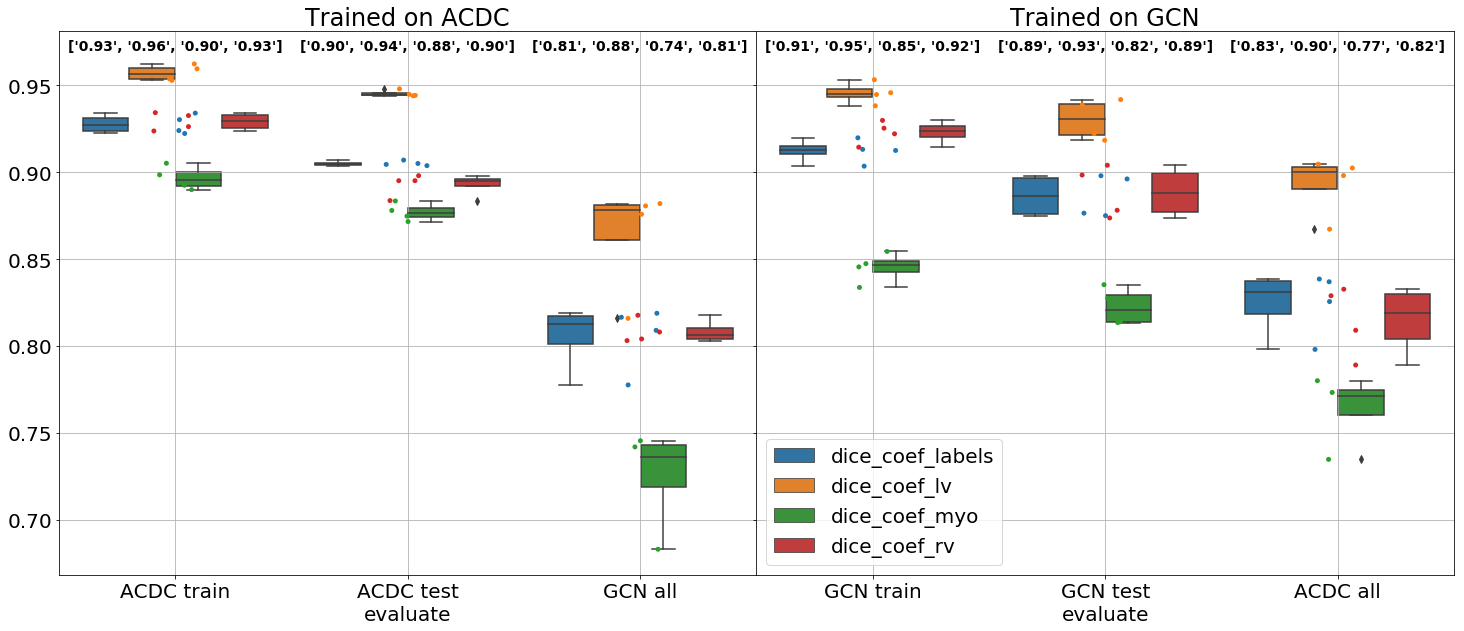

In [21]:
# evaluate per trainingspath/evaluation-path/label, average over all folds
# define one figure with two axis
plt.rcParams.update({'font.size': 20})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10), sharey=True)

ax1 = sns.stripplot(x='evaluate', hue='variable', y='value', data=df_long[df_long['trained'] == 'ACDC'],ax=ax1)
ax1 = sns.boxplot(x='evaluate', hue='variable', y='value', data=df_long[df_long['trained'] == 'ACDC'], ax=ax1)

ax1.set_title('Trained on ACDC')
ax1.grid(True)
ax1.legend( loc = 'lower left')
ax1.set_ylabel('')
ax1.legend().set_visible(False)

# create the median annotations for axis1
df_temp = df_long.copy()
df_temp['evaluate'] = pd.Categorical(df_temp['evaluate'], ['ACDC train', 'GCN train', 'ACDC test', 'GCN test', 'ACDC all', 'GCN all'])
medians = df_temp[df_temp['trained'] == 'ACDC'].groupby(['evaluate', 'variable'])['value'].median().round(2).values
medians = ['{:.2f}'.format(elem) for elem in medians]
start = 0
end = 4

for xtick in ax1.get_xticks():
    ax1.text(xtick,0.97,str(medians[start:end]),size='x-small',color='black',horizontalalignment='center', weight='semibold')
    end = end + 4
    start = start + 4
    

ax2 = sns.boxplot(x='evaluate', hue='variable', y='value', data=df_long[df_long['trained'] == 'GCN'],  ax=ax2)#ax2 = sns.stripplot(x='evaluate', hue='variable', y='value', data=df_long[df_long['trained'] == 'GCN'],  ax=ax2)
ax2 = sns.stripplot(x='evaluate', hue='variable', y='value', data=df_long[df_long['trained'] == 'GCN'],  ax=ax2)
ax2.set_title('Trained on GCN')
ax2.grid(True)
ax2.set_ylabel('')


# create the median annotations for axis2
df_temp = df_long.copy()
df_temp['evaluate'] = pd.Categorical(df_temp['evaluate'], ['ACDC train', 'GCN train', 'ACDC test', 'GCN test', 'ACDC all', 'GCN all'])
medians = df_temp[df_temp['trained'] == 'GCN'].groupby(['evaluate', 'variable'])['value'].median().round(2).values
medians = ['{:.2f}'.format(elem) for elem in medians]

start = 0
end = 4

for xtick in ax2.get_xticks():
    ax2.text(xtick,0.97,str(medians[start:end]),size='x-small',color='black',horizontalalignment='center', weight='semibold')
    end = end + 4
    start = start + 4
    
# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax1.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4], loc='lower left')

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('{}{}'.format(eval_path, 'gap_as_boxplot.pdf'))
plt.savefig('{}{}'.format(eval_path, 'new_gcn_gap_as_boxplot.png'))